In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron:
    """
    Perceptron Classifier.

    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
    random_state: int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_: 1d-array
        Weights after fitting.
    b_: Scalar
        Bias unit after fitting.

    errors: list
        Number of mis-classifications (updates) in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.
        :param X: {array-like}, shape = [n_examples, n_features]
        Training vector, where n_examples is the number of examples and n_features is the number of features.
        :param y: array-like, shape = [n_examples]
        Target values.
        :return: self: object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [3]:
# read dataset
df = pd.read_csv("iris.csv", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"],
                 encoding="utf-8")
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.label.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [5]:
# select Iris-setosa and Iris-versicolor
df = df[(df.label == "Iris-setosa") | (df.label == "Iris-versicolor")]
y = df.label.values
y = np.where(y == "Iris-setosa", 1, 0)
# extract sepal length and petal length
X = df[["sepal_length", "petal_length"]].values

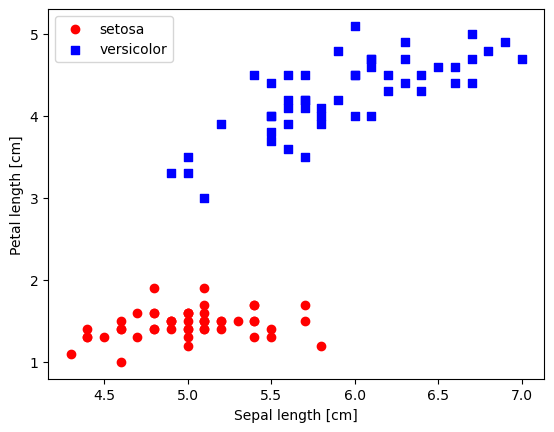

In [6]:
# plot
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:, 0], X[50:, 1], color="blue", marker="s", label="versicolor")
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [12]:
ppn = Perceptron(eta=0.05, n_iter=20)
ppn.fit(X, y)

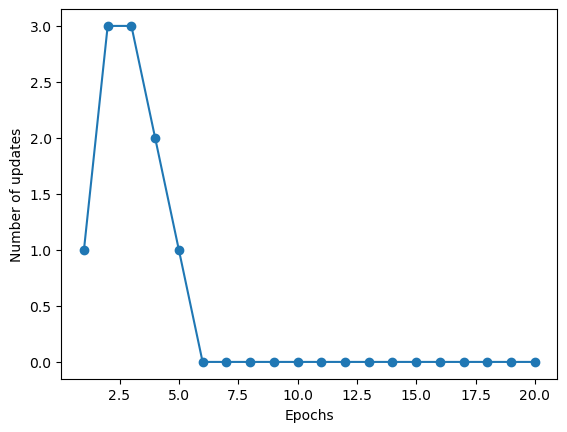

In [13]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [23]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    marker = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],marker=marker[idx], label=f"Class {cl}", edgecolors="black")

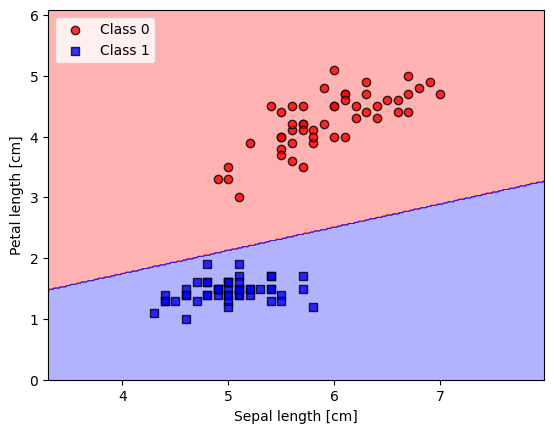

In [24]:
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()